# decision Tree Machine Learning Algorithm
So today we are gonna use another machine learning algorithm known as DecisionTreeClasifier 

In [1]:
#imporrting the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Importing our dataset
data = pd.read_csv("iphone_purchase_records.csv")
#lets just have a peek of how the dataset looks like
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


so as we can see its just a simple dataset of whether a customer purchased iphone or not where a 0 represents the customed did not buy the phone o the other hand a 1 represents the person actually purchased the iphone

our target is the iphone column while the rest of them all are features

In [4]:
#lets look through our data
data["Purchase Iphone"].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

so actually as you can see the number of people who actually bought the iphone is 143 whilw those who ddnt is a total of 257

In [8]:
#check whether our data has null values
data[data.isnull()==True]

,Gender,Age,Salary,Purchase Iphone
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
395,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN


In [9]:
#overview of the data
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

from the list of columns and type we can see that Gender is not a float, and actually machine cannot work with it unless its afloat so using the label encoder function we are going to use it to convert our label

In [16]:
#importing
from sklearn.preprocessing import LabelEncoder
gender_Encoder =  LabelEncoder()
data["Gender"] = gender_Encoder.fit_transform(data["Gender"])
#view our data
data.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
#features
features = 

In [17]:
#splitting our data into train test split
#Import our model
X = data[['Gender', 'Age', 'Salary']]
y = data['Purchase Iphone']

In [18]:
#now splitting our data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=67)

In [19]:
#import our tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [20]:
#lets print out our scores
print(f"our training score is : {tree.score(X_train,y_train)}")
print(f"our test score is : {tree.score(X_test,y_test)}")

our training score is : 0.9966666666666667
our test score is : 0.84


As expected, the accuracy on the training set is 99%—because the leaves are pure,
the tree was grown deep enough that it could perfectly memorize all the labels on the
training data
If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
and complex. Unpruned trees are therefore prone to overfitting and not generalizing
well to new data. Now let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data. 

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
#lets print out our scores
print(f"our training score is : {tree.score(X_train,y_train)}")
print(f"our test score is : {tree.score(X_test,y_test)}")

our training score is : 0.9233333333333333
our test score is : 0.93


 Limiting thedepth of the tree decreases overfitting. This leads to a lower accuracy on the training
set, but an improvement on the test set:


In [39]:
#now lets do something even more interesting,lets visualise our tree and we are gonna do that using our graphviz function
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_2.dot", class_names=["purchased", "not_purchased"],
 feature_names=X.columns, impurity=False, filled=True)

In [41]:
#feature importance in trees
print(f"the feature importances are: {tree.feature_importances_}")

the feature importances are: [0.         0.57845446 0.42154554]


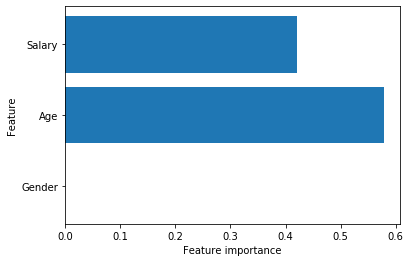

In [44]:
#lets visualise
def plot_feature_importances(model):
    
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

Here we see that the feature used in the top split (“Age”) is by far the most
important feature. This confirms our observation in analyzing the tree that the first
level already separates the two classes fairly well.